In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
X_train = pd.read_csv('../data/training_set_features.csv', index_col='respondent_id')
y_train = pd.read_csv('../data/training_set_labels.csv', index_col='respondent_id')

In [3]:
df = X_train.merge(y_train, on = 'respondent_id')

In [4]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# EDA

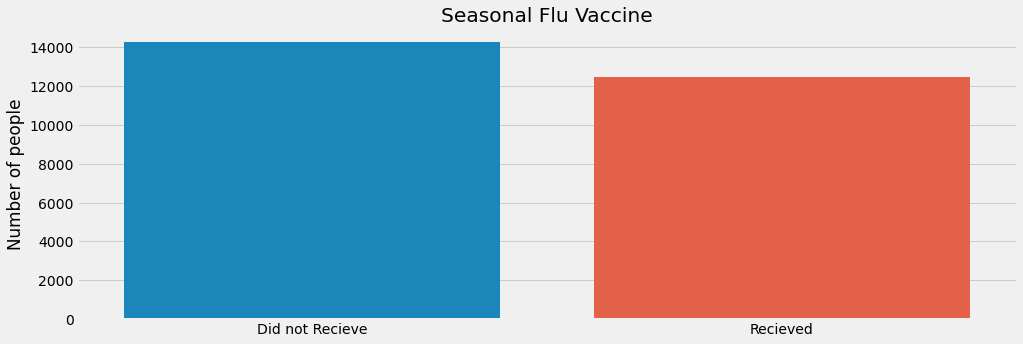

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.seasonal_vaccine)
plt.title('Seasonal Flu Vaccine')
plt.xlabel('')
plt.ylabel('Number of people')
ax.set_xticklabels(['Did not Recieve', 'Recieved']);

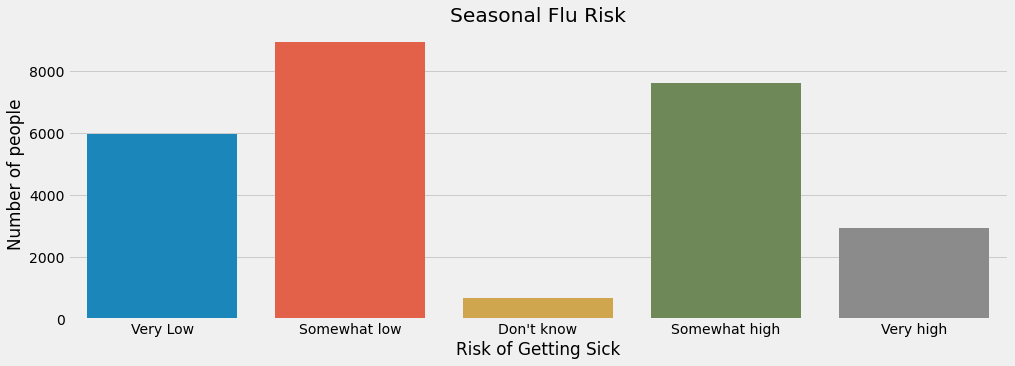

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.opinion_seas_risk)
plt.title('Seasonal Flu Risk')
plt.xlabel('Risk of Getting Sick')
plt.ylabel('Number of people')
ax.set_xticklabels(['Very Low', 'Somewhat low',
                    'Don\'t know', 'Somewhat high', 'Very high']);

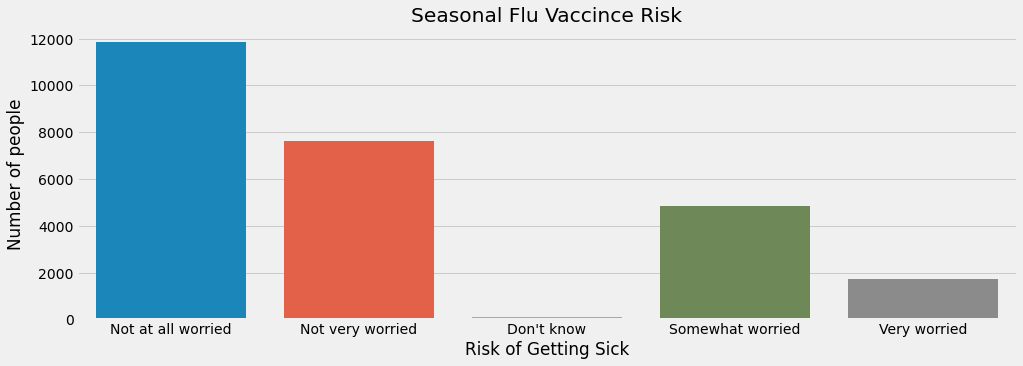

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.opinion_seas_sick_from_vacc)
plt.title('Seasonal Flu Vaccince Risk')
plt.xlabel('Risk of Getting Sick')
plt.ylabel('Number of people')
ax.set_xticklabels(['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']);

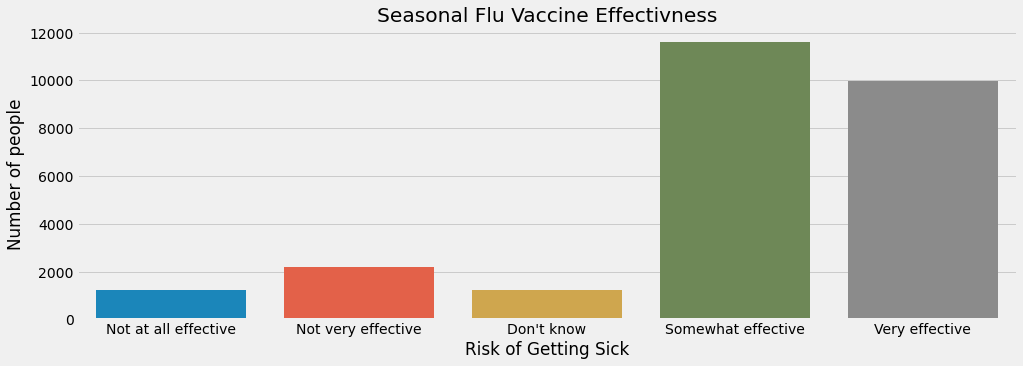

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(df.opinion_seas_vacc_effective)
plt.title('Seasonal Flu Vaccine Effectivness')
plt.xlabel('Risk of Getting Sick')
plt.ylabel('Number of people')
ax.set_xticklabels(['Not at all effective', 'Not very effective',
                    'Don\'t know', 'Somewhat effective', 'Very effective']);

## Looking at the level of Flu concern and Vaccination Status

In [9]:
df.seasonal_vaccine.value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [10]:
no_flu = df[df.seasonal_vaccine == 0]
level_concern_no_flu = no_flu.opinion_seas_risk
no_vaccine = level_concern_no_flu.value_counts(normalize=True).sort_index()
no_vaccine*100

1.0    33.834802
2.0    40.210617
3.0     2.149151
4.0    18.396733
5.0     5.408697
Name: opinion_seas_risk, dtype: float64

In [11]:
yes_flu = df[df.seasonal_vaccine == 1]
level_concern_yes_flu = yes_flu.opinion_seas_risk
yes_vaccine = level_concern_yes_flu.value_counts(normalize=True).sort_index()
yes_vaccine*100

1.0    10.225601
2.0    27.309138
3.0     3.081576
4.0    41.376492
5.0    18.007193
Name: opinion_seas_risk, dtype: float64

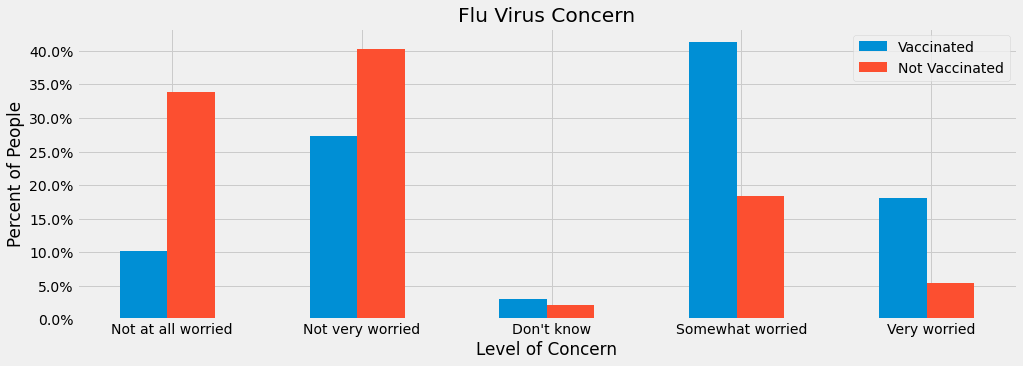

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(yes_vaccine.index, yes_vaccine.values, width= width, label = 'Vaccinated')
plt.bar(no_vaccine.index + width, no_vaccine.values, width=width, label = 'Not Vaccinated')
plt.title('Flu Virus Concern')
plt.ylabel('Percent of People')
plt.xlabel('Level of Concern')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=yes_vaccine.index + width-.10, labels=x);

## Race and Risk of Seasonal Flu

In [13]:
df.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [14]:
white = df[df.race == 'White']
white_concern = white.opinion_seas_risk.value_counts(normalize = True).sort_index()
white_concern*100

1.0    21.808230
2.0    35.209104
3.0     2.520766
4.0    30.263600
5.0    10.198300
Name: opinion_seas_risk, dtype: float64

In [15]:
black = df[df.race == 'Black']
black_concern = black.opinion_seas_risk.value_counts(normalize = True).sort_index()
black_concern*100

1.0    32.399807
2.0    28.681796
3.0     3.524867
4.0    22.356350
5.0    13.037180
Name: opinion_seas_risk, dtype: float64

In [16]:
hispanic = df[df.race == 'Hispanic']
hispanic_concern = hispanic.opinion_seas_risk.value_counts(normalize = True).sort_index()
hispanic_concern*100

1.0    22.260669
2.0    28.546713
3.0     2.133795
4.0    25.663206
5.0    21.395617
Name: opinion_seas_risk, dtype: float64

In [17]:
other_multiple = df[df.race == 'Other or Multiple']
other_multiple_concern = other_multiple.opinion_seas_risk.value_counts(normalize = True).sort_index()
other_multiple_concern*100

1.0    24.023062
2.0    34.080717
3.0     2.690583
4.0    26.841768
5.0    12.363869
Name: opinion_seas_risk, dtype: float64

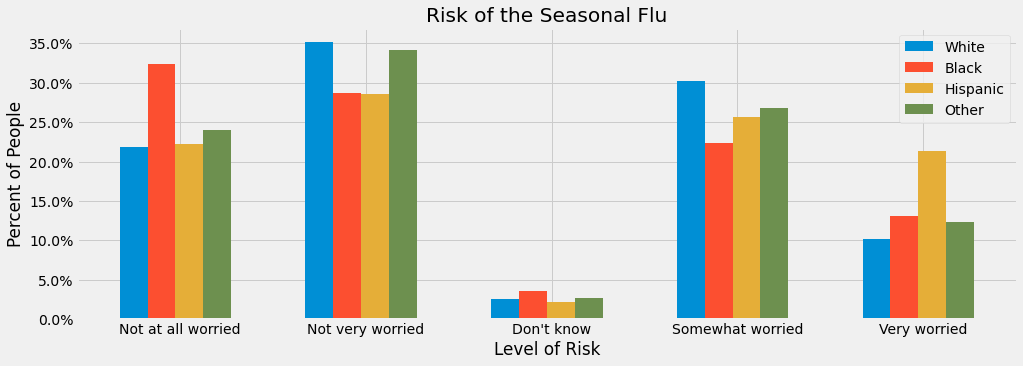

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.15
plt.bar(white_concern.index, white_concern.values, width= width, label = 'White')
plt.bar(black_concern.index + width, black_concern.values, width=width, label = 'Black')
plt.bar(hispanic_concern.index + width*2, hispanic_concern.values, width=width, label = 'Hispanic')
plt.bar(other_multiple_concern.index + width*3, other_multiple_concern.values, width=width, label = 'Other')
plt.title('Risk of the Seasonal Flu')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=white_concern.index + width+.10, labels=x);

# Race and Vaccine Effectiveness

In [19]:
white = df[df.race == 'White']
white_concern = white.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
white_concern*100

1.0     4.074198
2.0     7.841634
3.0     4.577482
4.0    44.595696
5.0    38.910991
Name: opinion_seas_vacc_effective, dtype: float64

In [20]:
black = df[df.race == 'Black']
black_concern = black.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
black_concern*100

1.0     7.774022
2.0     9.753742
3.0     5.939160
4.0    42.491550
5.0    34.041526
Name: opinion_seas_vacc_effective, dtype: float64

In [21]:
hispanic = df[df.race == 'Hispanic']
hispanic_concern = hispanic.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
hispanic_concern*100

1.0     5.926352
2.0    11.277330
3.0     3.970081
4.0    40.966628
5.0    37.859609
Name: opinion_seas_vacc_effective, dtype: float64

In [22]:
other_multiple = df[df.race == 'Other or Multiple']
other_multiple_concern = other_multiple.opinion_seas_vacc_effective.value_counts(normalize = True).sort_index()
other_multiple_concern*100

1.0     6.802289
2.0    10.934520
3.0     4.386523
4.0    46.598856
5.0    31.277813
Name: opinion_seas_vacc_effective, dtype: float64

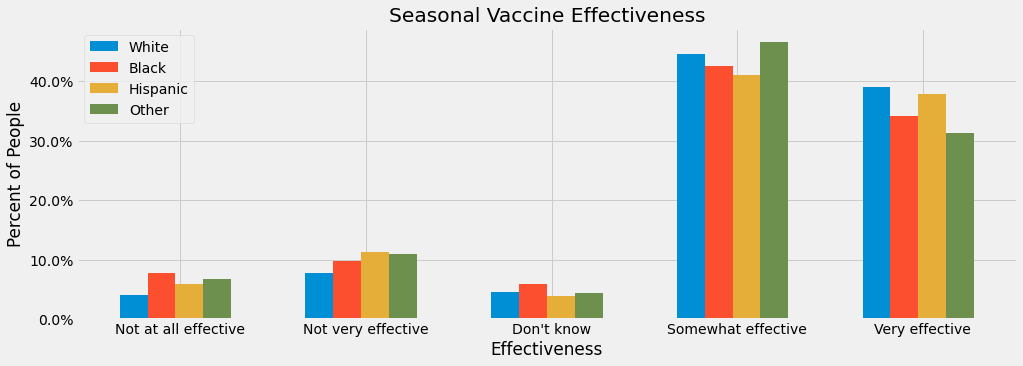

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all effective', 'Not very effective',
                    'Don\'t know', 'Somewhat effective', 'Very effective']
width = 0.15
plt.bar(white_concern.index, white_concern.values, width= width, label = 'White')
plt.bar(black_concern.index + width, black_concern.values, width=width, label = 'Black')
plt.bar(hispanic_concern.index + width*2, hispanic_concern.values, width=width, label = 'Hispanic')
plt.bar(other_multiple_concern.index + width*3, other_multiple_concern.values, width=width, label = 'Other')
plt.title('Seasonal Vaccine Effectiveness')
plt.ylabel('Percent of People')
plt.xlabel('Effectiveness')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=white_concern.index + width+.10, labels=x);

# Age and Flu Vaccine Status

In [24]:
df.age_group.value_counts(normalize=True).sort_index()*100

18 - 34 Years    19.526716
35 - 44 Years    14.408208
45 - 54 Years    19.612836
55 - 64 Years    20.829745
65+ Years        25.622496
Name: age_group, dtype: float64

## Ages 18-34 Years

### No Vaccine

In [25]:
under_34 = df[df.age_group == '18 - 34 Years']
under_34_no = under_34[under_34.seasonal_vaccine == 0]
under_34_no_concern = under_34_no.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_34_no_concern*100

1.0    28.995058
2.0    40.389896
3.0     1.400329
4.0    22.350357
5.0     6.864360
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [26]:
under_34 = df[df.age_group == '18 - 34 Years']
under_34_yes = under_34[under_34.seasonal_vaccine == 1]
under_34_yes_concern = under_34_yes.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_34_yes_concern*100

1.0     9.786354
2.0    27.773949
3.0     0.689180
4.0    40.523777
5.0    21.226740
Name: opinion_seas_risk, dtype: float64

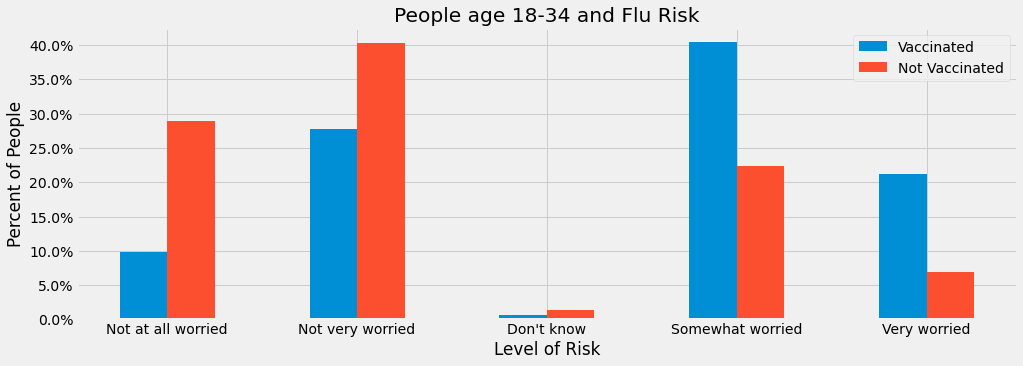

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(under_34_yes_concern.index, under_34_yes_concern.values, width, label = 'Vaccinated')
plt.bar(under_34_no_concern.index + width, under_34_no_concern.values, width, label = 'Not Vaccinated')
plt.title('People age 18-34 and Flu Risk')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=under_34_yes_concern.index + width/2, labels=x);

### Ages 35 - 44 Years

### No Vaccine

In [28]:
under_44 = df[df.age_group == '35 - 44 Years']
under_44_no = under_44[under_44.seasonal_vaccine == 0]
under_44_no_concern = under_44_no.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_44_no_concern*100

1.0    30.146138
2.0    43.632568
3.0     1.210856
4.0    19.164927
5.0     5.845511
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [29]:
under_44 = df[df.age_group == '35 - 44 Years']
under_44_yes = under_44[under_44.seasonal_vaccine == 1]
under_44_yes_concern = under_44_yes.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_44_yes_concern*100

1.0     7.258065
2.0    25.733138
3.0     1.319648
4.0    43.108504
5.0    22.580645
Name: opinion_seas_risk, dtype: float64

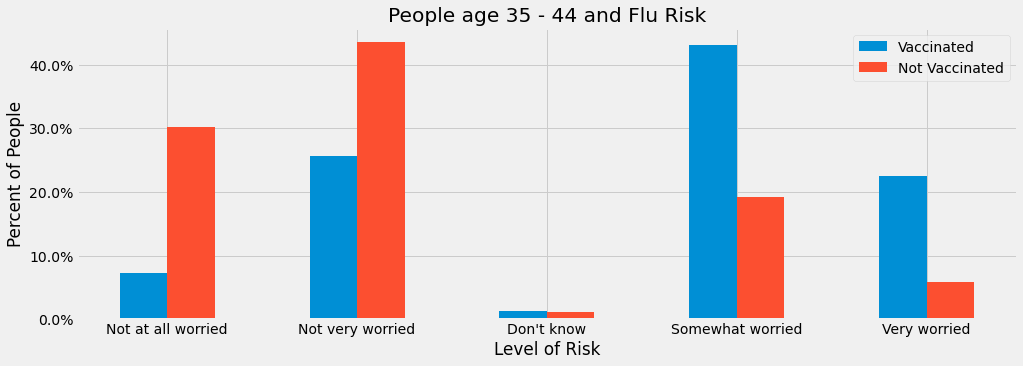

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(under_44_yes_concern.index, under_44_yes_concern.values, width, label = 'Vaccinated')
plt.bar(under_44_no_concern.index + width, under_44_no_concern.values, width, label = 'Not Vaccinated')
plt.title('People age 35 - 44 and Flu Risk')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=under_44_yes_concern.index + width/2, labels=x);

### Ages 45 - 54 Years

### No Vaccine

In [31]:
under_54 = df[df.age_group == '45 - 54 Years']
under_54_no = under_54[under_54.seasonal_vaccine == 0]
under_54_no_concern = under_54_no.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_54_no_concern*100

1.0    35.904948
2.0    41.569010
3.0     1.432292
4.0    15.917969
5.0     5.175781
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [32]:
under_54 = df[df.age_group == '45 - 54 Years']
under_54_yes = under_54[under_54.seasonal_vaccine == 1]
under_54_yes_concern = under_54_yes.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_54_yes_concern*100

1.0     7.540826
2.0    25.792507
3.0     1.536984
4.0    43.179635
5.0    21.950048
Name: opinion_seas_risk, dtype: float64

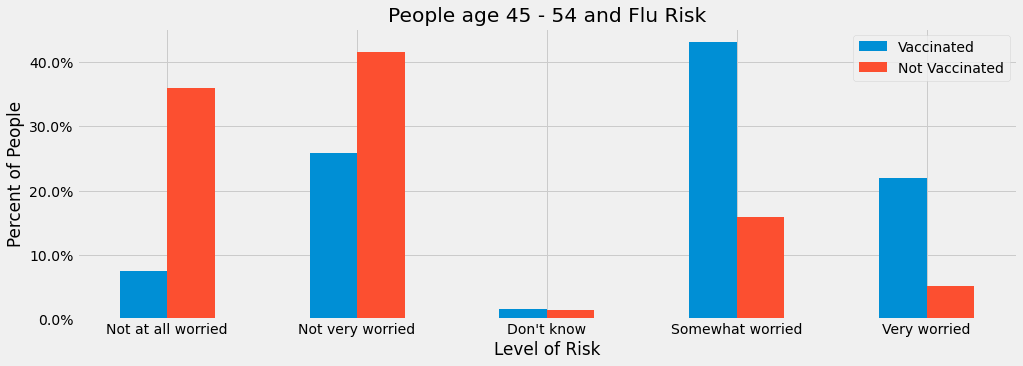

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(under_54_yes_concern.index, under_54_yes_concern.values, width, label = 'Vaccinated')
plt.bar(under_54_no_concern.index + width, under_54_no_concern.values, width, label = 'Not Vaccinated')
plt.title('People age 45 - 54 and Flu Risk')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=under_54_yes_concern.index + width/2, labels=x);

### Ages 55 - 64 Years

### No Vaccine

In [34]:
under_64 = df[df.age_group == '55 - 64 Years']
under_64_no = under_64[under_64.seasonal_vaccine == 0]
under_64_no_concern = under_64_no.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_64_no_concern*100

1.0    36.343200
2.0    40.726864
3.0     2.360435
4.0    16.223305
5.0     4.346197
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [35]:
under_64 = df[df.age_group == '55 - 64 Years']
under_64_yes = under_64[under_64.seasonal_vaccine == 1]
under_64_yes_concern = under_64_yes.opinion_seas_risk.value_counts(normalize = True).sort_index()
under_64_yes_concern*100

1.0     8.277087
2.0    26.394316
3.0     2.557726
4.0    43.658970
5.0    19.111901
Name: opinion_seas_risk, dtype: float64

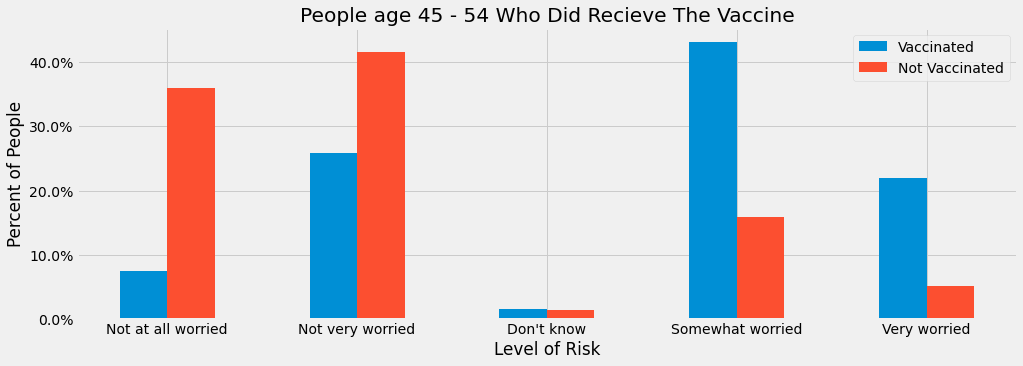

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(under_54_yes_concern.index, under_54_yes_concern.values, width, label = 'Vaccinated')
plt.bar(under_54_no_concern.index + width, under_54_no_concern.values, width, label = 'Not Vaccinated')
plt.title('People age 45 - 54 Who Did Recieve The Vaccine')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=under_64_yes_concern.index + width/2, labels=x);

### Ages 65+ Years

### No Vaccine

In [37]:
over_65 = df[df.age_group == '65+ Years']
over_65_no = over_65[over_65.seasonal_vaccine == 0]
over_65_no_concern = over_65_no.opinion_seas_risk.value_counts(normalize = True).sort_index()
over_65_no_concern*100

1.0    39.981660
2.0    33.608436
3.0     5.181110
4.0    17.102247
5.0     4.126547
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [38]:
over_65 = df[df.age_group == '65+ Years']
over_65_yes = over_65[over_65.seasonal_vaccine == 1]
over_65_yes_concern = over_65_yes.opinion_seas_risk.value_counts(normalize = True).sort_index()
over_65_yes_concern*100

1.0    13.710747
2.0    28.903140
3.0     5.417957
4.0    38.876603
5.0    13.091552
Name: opinion_seas_risk, dtype: float64

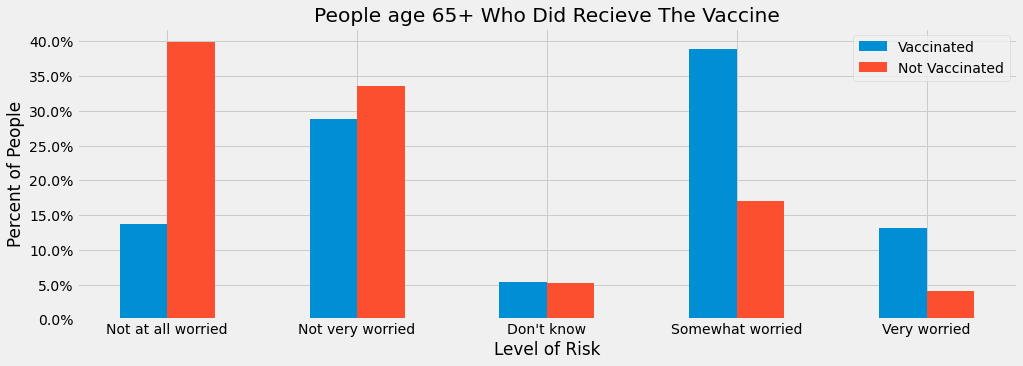

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(over_65_yes_concern.index, over_65_yes_concern.values, width, label = 'Vaccinated')
plt.bar(over_65_no_concern.index + 0.25, over_65_no_concern.values, width, label = 'Not Vaccinated')
plt.title('People age 65+ Who Did Recieve The Vaccine')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=over_65_yes_concern.index + width/2, labels=x);

# Education and Flu Vaccination Status

In [40]:
df.education.value_counts(normalize=True)*100

College Graduate    39.909091
Some College        27.837945
12 Years            22.913043
< 12 Years           9.339921
Name: education, dtype: float64

## < 12 Years of Education

### No Vaccine

In [41]:
no_highschool = df[df.education == '< 12 Years']
no_highschool_no_vac = no_highschool[no_highschool.seasonal_vaccine == 0]
no_highschool_no_vac_concern = no_highschool_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
no_highschool_no_vac_concern*100

1.0    31.586402
2.0    29.178470
3.0     4.603399
4.0    20.396601
5.0    14.235127
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [42]:
yes_highschool = df[df.education == '< 12 Years']
yes_highschool_yes_vac = yes_highschool[yes_highschool.seasonal_vaccine == 1]
yes_highschool_yes_vac_concern = yes_highschool_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
yes_highschool_yes_vac_concern*100

1.0    15.433404
2.0    22.621564
3.0     4.228330
4.0    32.029598
5.0    25.687104
Name: opinion_seas_risk, dtype: float64

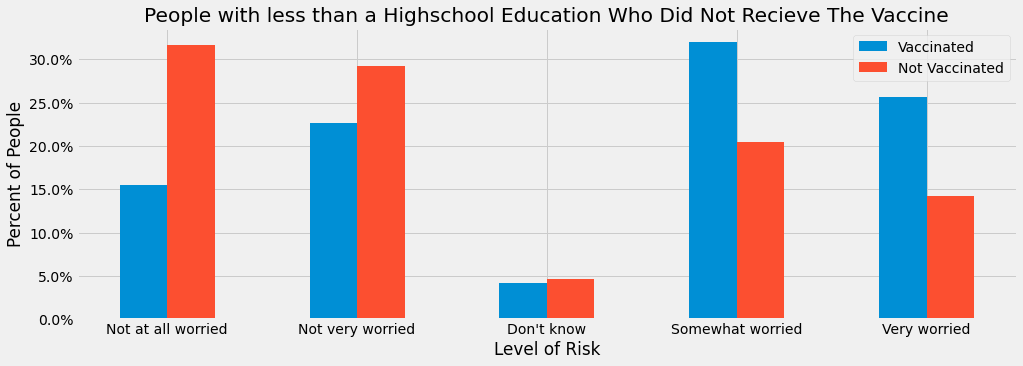

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(yes_highschool_yes_vac_concern.index, yes_highschool_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(no_highschool_no_vac_concern.index + width, no_highschool_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('People with less than a Highschool Education Who Did Not Recieve The Vaccine')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=yes_highschool_yes_vac_concern.index + width/2, labels=x);

## 12 Years Education

### No Vaccine

In [44]:
highschool = df[df.education == '12 Years']
highschool_no_vac = highschool[highschool.seasonal_vaccine == 0]
highschool_no_vac_concern = highschool_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
highschool_no_vac_concern*100

1.0    34.053208
2.0    38.841941
3.0     2.316119
4.0    18.716745
5.0     6.071987
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [45]:
highschool = df[df.education == '12 Years']
highschool_yes_vac = highschool[highschool.seasonal_vaccine == 1]
highschool_yes_vac_concern = highschool_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
highschool_yes_vac_concern*100

1.0    12.104857
2.0    25.944487
3.0     2.621434
4.0    40.747880
5.0    18.581342
Name: opinion_seas_risk, dtype: float64

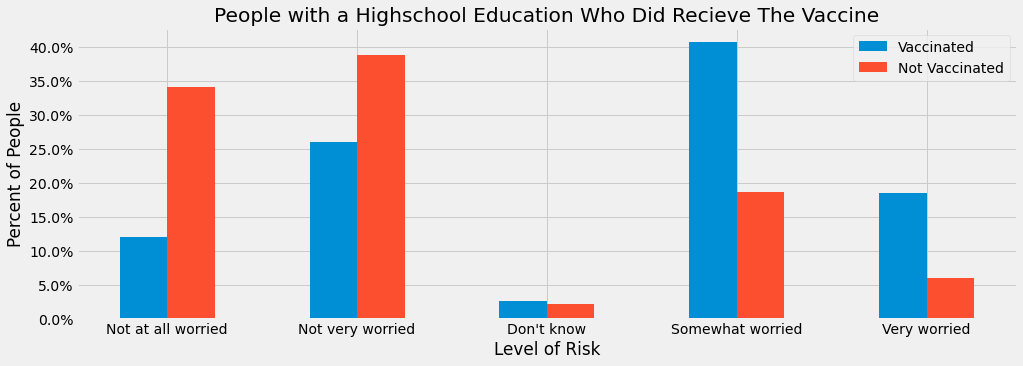

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(highschool_yes_vac_concern.index, highschool_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(highschool_no_vac_concern.index + width, highschool_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('People with a Highschool Education Who Did Recieve The Vaccine')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=highschool_yes_vac_concern.index + width/2, labels=x);

## Some College

### No Vaccine

In [47]:
some_college = df[df.education == 'Some College']
some_college_no_vac = some_college[some_college.seasonal_vaccine == 0]
some_college_no_vac_concern = some_college_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
some_college_no_vac_concern*100

1.0    37.412497
2.0    39.097744
3.0     1.374125
4.0    17.474721
5.0     4.640913
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [48]:
some_college = df[df.education == 'Some College']
some_college_yes_vac = some_college[some_college.seasonal_vaccine == 1]
some_college_yes_vac_concern = some_college_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
some_college_yes_vac_concern*100

1.0     9.748428
2.0    27.169811
3.0     2.861635
4.0    40.000000
5.0    20.220126
Name: opinion_seas_risk, dtype: float64

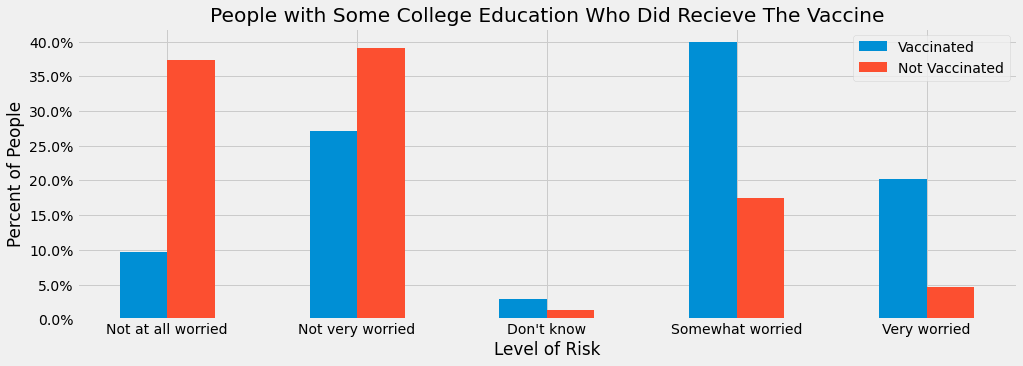

In [49]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(some_college_yes_vac_concern.index, some_college_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(some_college_no_vac_concern.index + width, some_college_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('People with Some College Education Who Did Recieve The Vaccine')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=some_college_yes_vac_concern.index + width/2, labels=x);

## College Graduate

### No Vaccine

In [50]:
college_graduate = df[df.education == 'College Graduate']
college_graduate_no_vac = college_graduate[college_graduate.seasonal_vaccine == 0]
college_graduate_no_vac_concern = college_graduate_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
college_graduate_no_vac_concern*100

1.0    31.392045
2.0    45.616883
3.0     1.562500
4.0    18.425325
5.0     3.003247
Name: opinion_seas_risk, dtype: float64

### Yes Vaccine

In [51]:
college_graduate = df[df.education == 'College Graduate']
college_graduate_yes_vac = college_graduate[college_graduate.seasonal_vaccine == 1]
college_graduate_yes_vac_concern = college_graduate_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
college_graduate_yes_vac_concern*100

1.0     7.977484
2.0    29.134317
3.0     2.950311
4.0    44.836957
5.0    15.100932
Name: opinion_seas_risk, dtype: float64

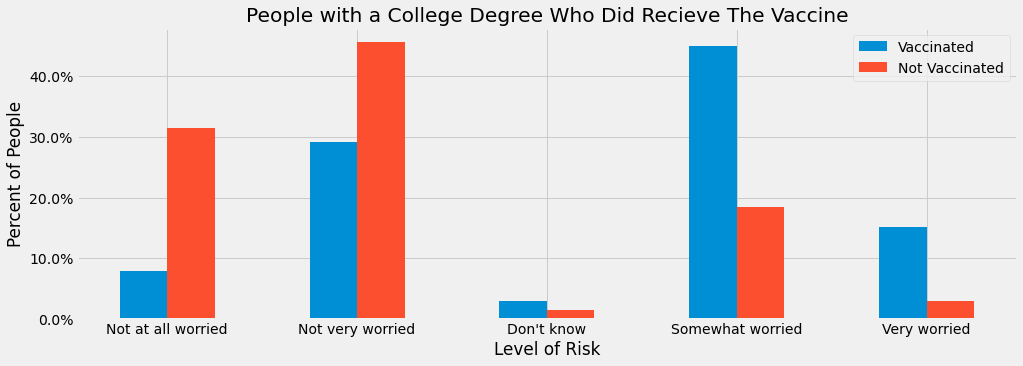

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(college_graduate_yes_vac_concern.index, college_graduate_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(college_graduate_no_vac_concern.index + width, college_graduate_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('People with a College Degree Who Did Recieve The Vaccine')
plt.ylabel('Percent of People')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=college_graduate_yes_vac_concern.index + width/2, labels=x);

# Sex and Flu Vaccine Status

In [53]:
df.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

## Females

In [54]:
female = df[df.sex == 'Female']
female_no_vac = female[female.seasonal_vaccine == 0]
female_no_vac_concern = female_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
female_no_vac_concern*100

1.0    32.032854
2.0    40.143737
3.0     2.156057
4.0    19.674025
5.0     5.993326
Name: opinion_seas_risk, dtype: float64

In [55]:
female = df[df.sex == 'Female']
female_yes_vac = female[female.seasonal_vaccine == 1]
female_yes_vac_concern = female_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
female_yes_vac_concern*100

1.0     9.501157
2.0    25.752121
3.0     2.931345
4.0    41.553098
5.0    20.262278
Name: opinion_seas_risk, dtype: float64

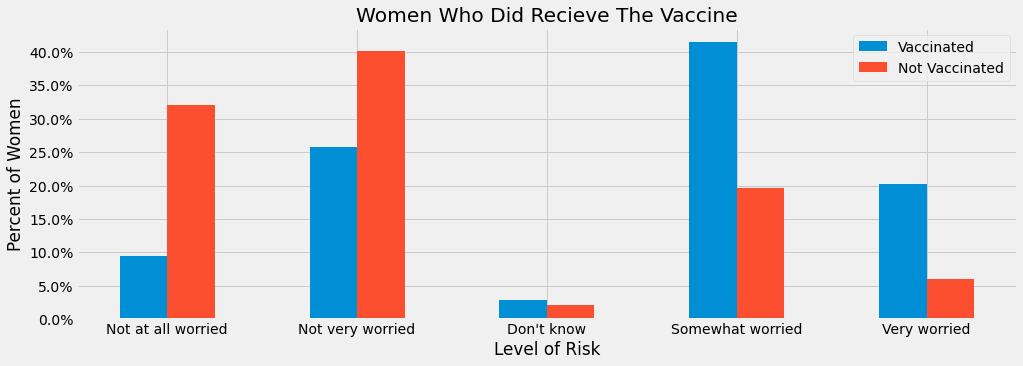

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(female_yes_vac_concern.index, female_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(female_no_vac_concern.index + 0.25, female_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('Women Who Did Recieve The Vaccine')
plt.ylabel('Percent of Women')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=female_no_vac_concern.index + width/2, labels=x);

## Males

In [57]:
male = df[df.sex == 'Male']
male_no_vac = male[male.seasonal_vaccine == 0]
male_no_vac_concern = male_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
male_no_vac_concern*100

1.0    36.111562
2.0    40.295119
3.0     2.140425
4.0    16.782877
5.0     4.670018
Name: opinion_seas_risk, dtype: float64

In [58]:
male = df[df.sex == 'Male']
male_yes_vac = male[male.seasonal_vaccine == 1]
male_yes_vac_concern = male_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
male_yes_vac_concern*100

1.0    11.490126
2.0    30.026930
3.0     3.343806
4.0    41.068223
5.0    14.070916
Name: opinion_seas_risk, dtype: float64

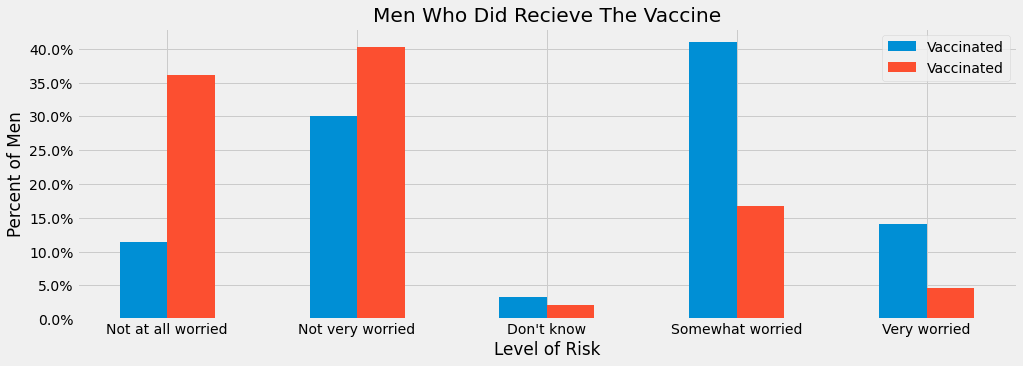

In [59]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(male_yes_vac_concern.index, male_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(male_no_vac_concern.index + width, male_no_vac_concern.values, width, label = 'Vaccinated')
plt.title('Men Who Did Recieve The Vaccine')
plt.ylabel('Percent of Men')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=male_yes_vac_concern.index + width/2, labels=x);

# Matrital Status and Flu Status

In [60]:
df.marital_status.value_counts(normalize=True)*100

Married        53.579193
Not Married    46.420807
Name: marital_status, dtype: float64

## Married

In [61]:
married = df[df.marital_status == 'Married']
married_no_vac = married[married.seasonal_vaccine == 0]
married_no_vac_concern = married_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
married_no_vac_concern*100

1.0    32.297140
2.0    43.096906
3.0     1.634559
4.0    18.403386
5.0     4.568009
Name: opinion_seas_risk, dtype: float64

In [62]:
married = df[df.marital_status == 'Married']
married_yes_vac = married[married.seasonal_vaccine == 1]
married_yes_vac_concern = married_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
married_yes_vac_concern*100

1.0     8.310912
2.0    28.221226
3.0     2.451420
4.0    43.572496
5.0    17.443946
Name: opinion_seas_risk, dtype: float64

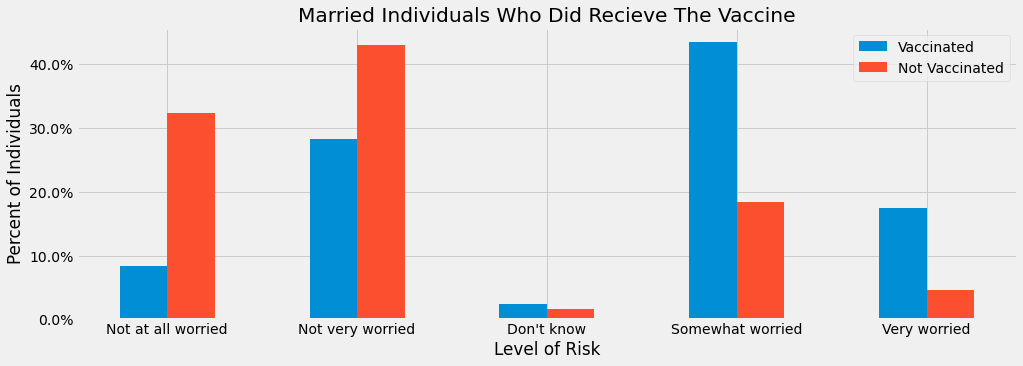

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(married_yes_vac_concern.index, married_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(married_no_vac_concern.index + width, married_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('Married Individuals Who Did Recieve The Vaccine')
plt.ylabel('Percent of Individuals')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=married_yes_vac_concern.index + width/2, labels=x);

## Not Married

In [64]:
not_married = df[df.marital_status == 'Not Married']
not_married_no_vac = not_married[not_married.seasonal_vaccine == 0]
not_married_no_vac_concern = not_married_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
not_married_no_vac_concern*100

1.0    35.349832
2.0    37.580202
3.0     2.291476
4.0    18.515124
5.0     6.263367
Name: opinion_seas_risk, dtype: float64

In [65]:
not_married = df[df.marital_status == 'Not Married']
not_married_yes_vac = not_married[not_married.seasonal_vaccine == 1]
not_married_yes_vac_concern = not_married_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
not_married_yes_vac_concern*100

1.0    12.246475
2.0    26.289357
3.0     3.689395
4.0    38.922156
5.0    18.852617
Name: opinion_seas_risk, dtype: float64

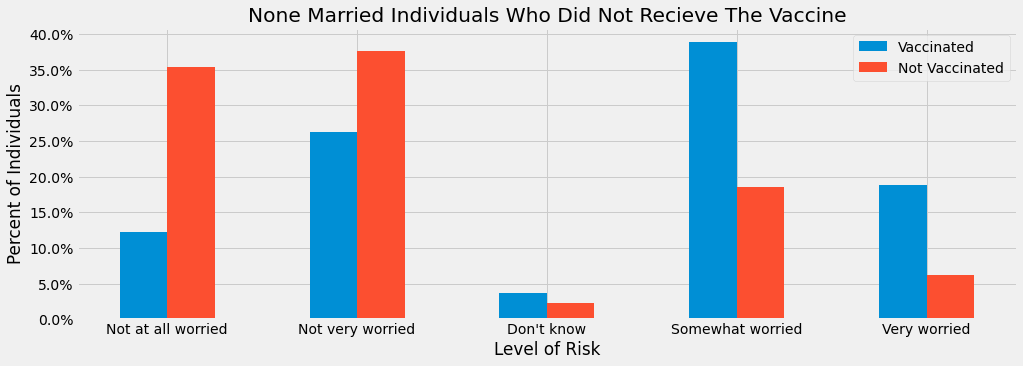

In [66]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(not_married_yes_vac_concern.index, not_married_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(not_married_no_vac_concern.index + 0.25, not_married_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('None Married Individuals Who Did Not Recieve The Vaccine')
plt.ylabel('Percent of Individuals')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=not_married_yes_vac_concern.index + width/2, labels=x);

# Chronic Medical Condition and H1N1 Status

In [67]:
df.chronic_med_condition.value_counts(normalize=True)*100

0.0    71.67392
1.0    28.32608
Name: chronic_med_condition, dtype: float64

In [68]:
no_condition = df[df.chronic_med_condition == 0]
no_condition_no_vac = no_condition[no_condition.seasonal_vaccine == 0]
no_condition_no_vac_concern = no_condition_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
no_condition_no_vac_concern*100

1.0    35.093254
2.0    41.607126
3.0     1.948594
4.0    16.832143
5.0     4.518883
Name: opinion_seas_risk, dtype: float64

In [69]:
no_condition = df[df.chronic_med_condition == 1]
no_condition_yes_vac = no_condition[no_condition.seasonal_vaccine == 1]
no_condition_yes_vac_concern = no_condition_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
no_condition_yes_vac_concern*100

1.0     9.533561
2.0    22.343572
3.0     3.299204
4.0    40.819113
5.0    24.004551
Name: opinion_seas_risk, dtype: float64

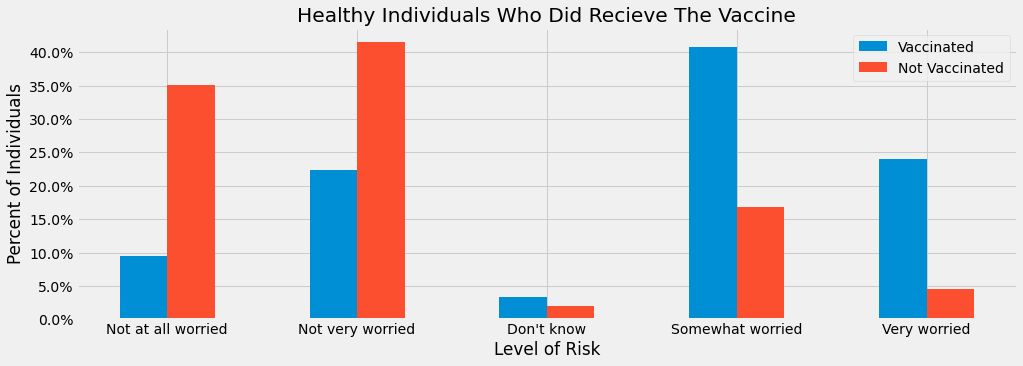

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(no_condition_yes_vac_concern.index, no_condition_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(no_condition_no_vac_concern.index + 0.25, no_condition_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('Healthy Individuals Who Did Recieve The Vaccine')
plt.ylabel('Percent of Individuals')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=no_condition_yes_vac_concern.index + width/2, labels=x);

## Chronic Medical Condition

In [71]:
condition = df[df.chronic_med_condition == 1]
condition_no_vac = condition[condition.seasonal_vaccine == 0]
condition_no_vac_concern = condition_no_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
condition_no_vac_concern*100

1.0    29.209979
2.0    35.343035
3.0     2.425502
4.0    24.289674
5.0     8.731809
Name: opinion_seas_risk, dtype: float64

In [72]:
condition = df[df.chronic_med_condition == 1]
condition_yes_vac = condition[condition.seasonal_vaccine == 1]
condition_yes_vac_concern = condition_yes_vac.opinion_seas_risk.value_counts(normalize = True).sort_index()
condition_yes_vac_concern*100

1.0     9.533561
2.0    22.343572
3.0     3.299204
4.0    40.819113
5.0    24.004551
Name: opinion_seas_risk, dtype: float64

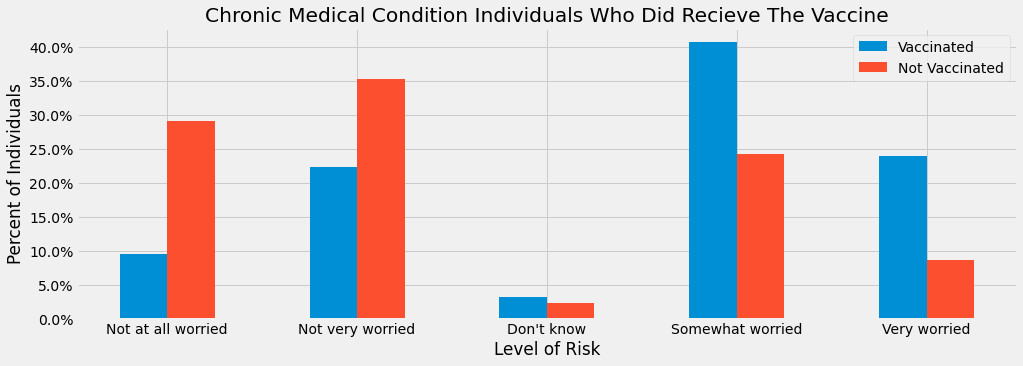

In [73]:
fig, ax = plt.subplots(figsize=(15, 5))

x = ['Not at all worried', 'Not very worried',
                    'Don\'t know', 'Somewhat worried', 'Very worried']
width = 0.25
plt.bar(condition_yes_vac_concern.index, condition_yes_vac_concern.values, width, label = 'Vaccinated')
plt.bar(condition_no_vac_concern.index + width, condition_no_vac_concern.values, width, label = 'Not Vaccinated')
plt.title('Chronic Medical Condition Individuals Who Did Recieve The Vaccine')
plt.ylabel('Percent of Individuals')
plt.xlabel('Level of Risk')
plt.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=condition_yes_vac_concern.index + width/2, labels=x);